In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28})

In [2]:
# Generate random signal
n = 1000
n_nnz = 10
hat_x = np.zeros(n)
nnz_idx = np.random.randint(0, n, n_nnz)
hat_x[nnz_idx] = np.random.randn(n_nnz)

# Samples
n_samples = 100
A = np.random.randn(n_samples, n)
y = A @ hat_x

In [3]:
# Compute least-norm solutions
x = cp.Variable(n)
prob_ls = cp.Problem(cp.Minimize(cp.sum_squares(x)), [A @ x == y])
prob_ls.solve()
x_ls = x.value
prob_l1 = cp.Problem(cp.Minimize(cp.norm(x, 1)), [A @ x == y])
prob_l1.solve()
x_l1 = x.value

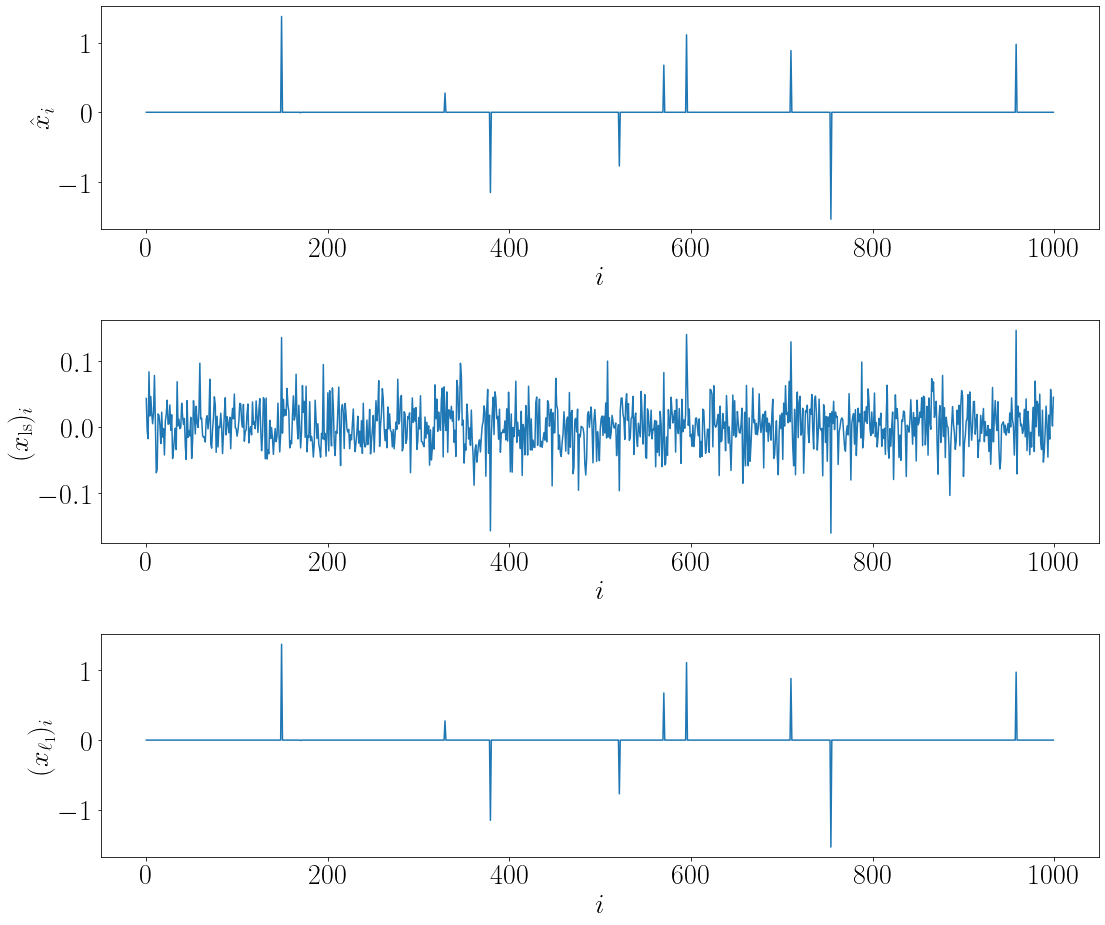

In [4]:
# Plot two solutions
fig, axs = plt.subplots(3, 1, figsize=(16, 13.5),
                        tight_layout=True)
axs[0].plot(hat_x)
axs[0].set_xlabel(r'$i$')
axs[0].set_ylabel(r'$\hat{x}_i$')
axs[1].plot(x_ls)
axs[1].set_xlabel(r'$i$')
axs[1].set_ylabel(r'$(x_{\rm ls})_i$')
axs[2].plot(x_l1)
axs[2].set_xlabel(r'$i$')
axs[2].set_ylabel(r'$(x_{\rm \ell_1})_i$')

plt.savefig('sparse_signal_recovery.pdf')